In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from IPython.display import display

In [9]:
global filename
global rainfall, time
global Xtrain, Xtest, Ytrain, Ytest
global dataset
global X, Y
global rmse_arr, accuracy_arr
actual = []
forecast = []

In [18]:
def uploadDataset():
    global filename
    global dataset
    global rainfall, time
    filename = "Dataset/Rainfall.csv"
    dataset = pd.read_csv(filename,sep=';',usecols=['DATEFRACTION','Rainfall'])
    display(dataset)
    rainfall = dataset['Rainfall']
    time= dataset['DATEFRACTION']
uploadDataset()    

,DATEFRACTION,Rainfall
0,1749.042,96.7
1,1749.123,104.3
2,1749.204,116.7
3,1749.288,92.8
4,1749.371,141.7
...,...,...
3221,2017.453,19.2
3222,2017.538,18.3
3223,2017.623,33.1
3224,2017.705,43.6


In [19]:
def preprocess():
    global dataset
    global X, Y
    global Xtrain, Xtest, Ytrain, Ytest
    dataset = dataset.values
    X = dataset[:,0]
    Y = dataset[:,1]
    X = X.reshape(-1, 1)
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.1,random_state=0)
    print()
    print("Dataset contains total records : "+str(X.shape[0]))
    print("Totals Records used to train Machine Learning Algorithms : "+str(Xtrain.shape[0]))
    print("Totals Records used to test ML Algorithms Root Mean Square Error: "+str(Xtest.shape[0]))
    print()
preprocess()    


Dataset contains total records : 3226
Totals Records used to train Machine Learning Algorithms : 2903
Totals Records used to test ML Algorithms Root Mean Square Error: 323



In [20]:
def predict(algorithm_name, actual,forecast):
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel('Day No')
    plt.ylabel('Actual & Predicted Rainfall')
    plt.plot(actual, 'ro-', color = 'blue')
    plt.plot(forecast, 'ro-', color = 'green')
    plt.legend(['Actual Rainfall', 'Predicted Rainfall'], loc='upper left')
    #plt.xticks(wordloss.index)
    plt.title(algorithm_name+' Rainfall Prediction Graph')
    plt.show()

SVM RMSE : 64.6
SVM Accuracy : -1.1617766582256994
Day 1 Acutal Rainfall : 126.1 Predicted Rainfall : 68.57268997802231 Moderate Rain
Day 2 Acutal Rainfall : 61.1 Predicted Rainfall : 80.75440864529455 Heavy Rain
Day 3 Acutal Rainfall : 24.4 Predicted Rainfall : 68.12282097822992 Moderate Rain
Day 4 Acutal Rainfall : 44.8 Predicted Rainfall : 61.68314685265266 Moderate Rain
Day 5 Acutal Rainfall : 45.4 Predicted Rainfall : 68.73596282559348 Moderate Rain
Day 6 Acutal Rainfall : 207.2 Predicted Rainfall : 80.33992790128954 Heavy Rain
Day 7 Acutal Rainfall : 25.2 Predicted Rainfall : 67.4837786779484 Moderate Rain
Day 8 Acutal Rainfall : 11.2 Predicted Rainfall : 61.69836935059293 Moderate Rain
Day 9 Acutal Rainfall : 65.0 Predicted Rainfall : 67.0179729209384 Moderate Rain
Day 10 Acutal Rainfall : 47.5 Predicted Rainfall : 67.98816464017423 Moderate Rain
Day 11 Acutal Rainfall : 24.7 Predicted Rainfall : 71.41639222597537 Moderate Rain
Day 12 Acutal Rainfall : 73.3 Predicted Rainfall : 

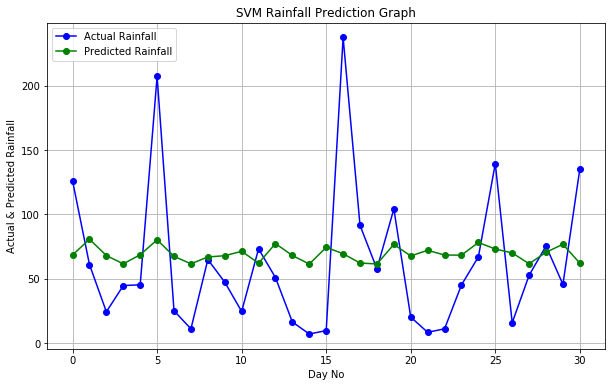

In [21]:
def runSVM():
    global rmse_arr, accuracy_arr
    rmse_arr = []
    accuracy_arr = []
    actual.clear()
    forecast.clear()
    global Xtrain, Xtest, Ytrain, Ytest
    svm_cls = SVR(C=1.0, epsilon=0.2)
    svm_cls.fit(Xtrain,Ytrain)
    prediction = svm_cls.predict(Xtest) 
    i = len(Ytest)-1
    while i > 0:
        actual.append(Ytest[i])
        forecast.append(prediction[i])
        i = i - 1
        if len(actual) > 30:
            break
    rmse = sqrt(mean_squared_error(Ytest,prediction))
    acc = svm_cls.score(Xtrain,Ytrain) * 100
    print("SVM RMSE : "+str(round(rmse,1)))
    print("SVM Accuracy : "+str(acc))
    rmse_arr.append(rmse)
    accuracy_arr.append(acc)
    for i in range(len(actual)):
        status = "Low"
        if forecast[i] >= 100:
            status = "Very Heavy Rain"
        if forecast[i] >= 80 and forecast[i] < 100:
            status = "Heavy Rain"
        if forecast[i] >= 50 and forecast[i] < 80:
            status = "Moderate Rain"
        if forecast[i] >= 30 and forecast[i] < 50:
            status = "Light Rain"
        if forecast[i] < 30:
            status = "No Rain"
        print("Day "+str((i+1))+" Acutal Rainfall : "+str(actual[i])+" Predicted Rainfall : "+str(forecast[i])+" "+status)
    predict("SVM",actual, forecast)
runSVM()    

Random Forest RMSE : 23.6
Random Forest Accuracy : 98.44732175007917
Day 1 Acutal Rainfall : 126.1 Predicted Rainfall : 105.97399999999998 Very Heavy Rain
Day 2 Acutal Rainfall : 61.1 Predicted Rainfall : 38.218999999999944 Light Rain
Day 3 Acutal Rainfall : 24.4 Predicted Rainfall : 40.559000000000054 Light Rain
Day 4 Acutal Rainfall : 44.8 Predicted Rainfall : 13.687999999999999 No Rain
Day 5 Acutal Rainfall : 45.4 Predicted Rainfall : 78.33599999999987 Moderate Rain
Day 6 Acutal Rainfall : 207.2 Predicted Rainfall : 176.7550000000001 Very Heavy Rain
Day 7 Acutal Rainfall : 25.2 Predicted Rainfall : 11.442999999999994 No Rain
Day 8 Acutal Rainfall : 11.2 Predicted Rainfall : 26.266 No Rain
Day 9 Acutal Rainfall : 65.0 Predicted Rainfall : 86.43 Heavy Rain
Day 10 Acutal Rainfall : 47.5 Predicted Rainfall : 75.826 Moderate Rain
Day 11 Acutal Rainfall : 24.7 Predicted Rainfall : 75.81299999999989 Moderate Rain
Day 12 Acutal Rainfall : 73.3 Predicted Rainfall : 75.47000000000007 Moderate

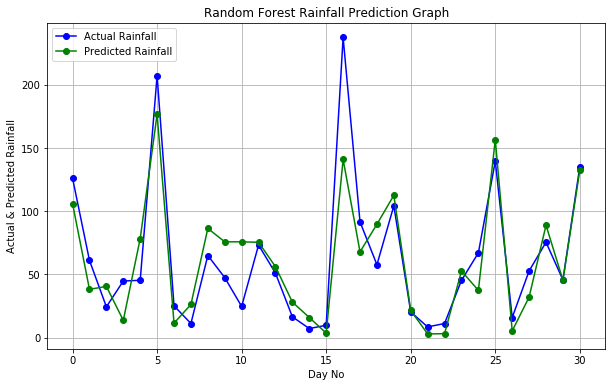

In [22]:
def runRandomForest():
    global rmse_arr, accuracy_arr
    actual.clear()
    forecast.clear()
    global Xtrain, Xtest, Ytrain, Ytest
    rf_cls = RandomForestRegressor()
    rf_cls.fit(Xtrain,Ytrain)
    prediction = rf_cls.predict(Xtest) 
    i = len(Ytest)-1
    while i > 0:
        actual.append(Ytest[i])
        forecast.append(prediction[i])
        i = i - 1
        if len(actual) > 30:
            break
    rmse = sqrt(mean_squared_error(Ytest,prediction))
    acc = rf_cls.score(Xtrain,Ytrain) * 100
    print("Random Forest RMSE : "+str(round(rmse,1)))
    print("Random Forest Accuracy : "+str(acc))
    rmse_arr.append(rmse)
    accuracy_arr.append(acc)
    for i in range(len(actual)):
        status = "Low"
        if forecast[i] >= 100:
            status = "Very Heavy Rain"
        if forecast[i] >= 80 and forecast[i] < 100:
            status = "Heavy Rain"
        if forecast[i] >= 50 and forecast[i] < 80:
            status = "Moderate Rain"
        if forecast[i] >= 30 and forecast[i] < 50:
            status = "Light Rain"
        if forecast[i] < 30:
            status = "No Rain"
        print("Day "+str((i+1))+" Acutal Rainfall : "+str(actual[i])+" Predicted Rainfall : "+str(forecast[i])+" "+status)
    predict("Random Forest",actual, forecast)
runRandomForest()

Decision Tree RMSE : 26.7
Decision Tree Accuracy : 100.0
Day 1 Acutal Rainfall : 126.1 Predicted Rainfall : 115.2 Very Heavy Rain
Day 2 Acutal Rainfall : 61.1 Predicted Rainfall : 35.2 Light Rain
Day 3 Acutal Rainfall : 24.4 Predicted Rainfall : 35.9 Light Rain
Day 4 Acutal Rainfall : 44.8 Predicted Rainfall : 2.5 No Rain
Day 5 Acutal Rainfall : 45.4 Predicted Rainfall : 75.2 Moderate Rain
Day 6 Acutal Rainfall : 207.2 Predicted Rainfall : 177.1 Very Heavy Rain
Day 7 Acutal Rainfall : 25.2 Predicted Rainfall : 9.3 No Rain
Day 8 Acutal Rainfall : 11.2 Predicted Rainfall : 35.0 Light Rain
Day 9 Acutal Rainfall : 65.0 Predicted Rainfall : 60.8 Moderate Rain
Day 10 Acutal Rainfall : 47.5 Predicted Rainfall : 85.5 Heavy Rain
Day 11 Acutal Rainfall : 24.7 Predicted Rainfall : 55.4 Moderate Rain
Day 12 Acutal Rainfall : 73.3 Predicted Rainfall : 78.3 Moderate Rain
Day 13 Acutal Rainfall : 51.0 Predicted Rainfall : 60.2 Moderate Rain
Day 14 Acutal Rainfall : 16.5 Predicted Rainfall : 29.6 No R

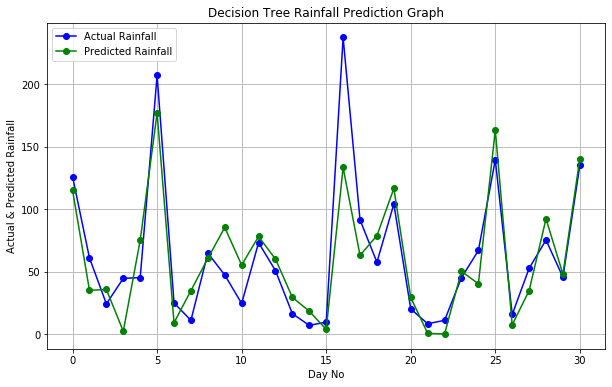

In [23]:
def runDecisionTree():
    global rmse_arr, accuracy_arr
    actual.clear()
    forecast.clear()
    global Xtrain, Xtest, Ytrain, Ytest
    dt_cls = DecisionTreeRegressor()
    dt_cls.fit(Xtrain,Ytrain)
    prediction = dt_cls.predict(Xtest) 
    i = len(Ytest)-1
    while i > 0:
        actual.append(Ytest[i])
        forecast.append(prediction[i])
        i = i - 1
        if len(actual) > 30:
            break
    rmse = sqrt(mean_squared_error(Ytest,prediction))
    acc = dt_cls.score(Xtrain,Ytrain) * 100
    print("Decision Tree RMSE : "+str(round(rmse,1)))
    print("Decision Tree Accuracy : "+str(acc))
    rmse_arr.append(rmse)
    accuracy_arr.append(acc)
    for i in range(len(actual)):
        status = "Low"
        if forecast[i] >= 100:
            status = "Very Heavy Rain"
        if forecast[i] >= 80 and forecast[i] < 100:
            status = "Heavy Rain"
        if forecast[i] >= 50 and forecast[i] < 80:
            status = "Moderate Rain"
        if forecast[i] >= 30 and forecast[i] < 50:
            status = "Light Rain"
        if forecast[i] < 30:
            status = "No Rain"
        print("Day "+str((i+1))+" Acutal Rainfall : "+str(actual[i])+" Predicted Rainfall : "+str(forecast[i])+" "+status)
    predict("Decision Tree",actual, forecast)
runDecisionTree()    

Neural Network RMSE : 65.0
Neural Network Accuracy : -2.0897893703028187
Day 1 Acutal Rainfall : 126.1 Predicted Rainfall : 73.04373304740332 Moderate Rain
Day 2 Acutal Rainfall : 61.1 Predicted Rainfall : 75.7793691774203 Moderate Rain
Day 3 Acutal Rainfall : 24.4 Predicted Rainfall : 72.38784386788757 Moderate Rain
Day 4 Acutal Rainfall : 44.8 Predicted Rainfall : 69.37364105964868 Moderate Rain
Day 5 Acutal Rainfall : 45.4 Predicted Rainfall : 73.21651734126921 Moderate Rain
Day 6 Acutal Rainfall : 207.2 Predicted Rainfall : 75.65154719646912 Moderate Rain
Day 7 Acutal Rainfall : 25.2 Predicted Rainfall : 68.5801387891962 Moderate Rain
Day 8 Acutal Rainfall : 11.2 Predicted Rainfall : 69.37041575282994 Moderate Rain
Day 9 Acutal Rainfall : 65.0 Predicted Rainfall : 68.63120614716102 Moderate Rain
Day 10 Acutal Rainfall : 47.5 Predicted Rainfall : 68.52565414186377 Moderate Rain
Day 11 Acutal Rainfall : 24.7 Predicted Rainfall : 74.12520914096598 Moderate Rain
Day 12 Acutal Rainfall 

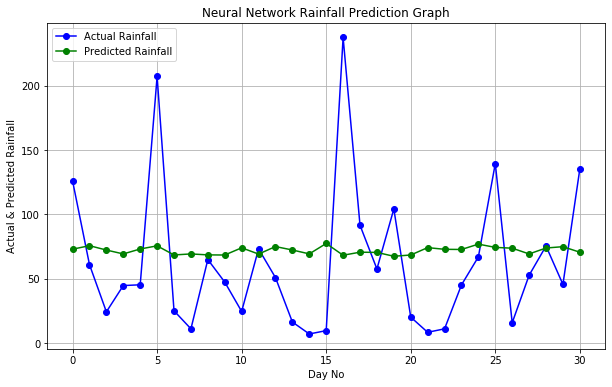

In [24]:
def runNeuralNetwork():
    global rmse_arr, accuracy_arr, X, Y
    actual.clear()
    forecast.clear()
    global Xtrain, Xtest, Ytrain, Ytest
    nn = MLPRegressor()
    nn.fit(X, Y)
    prediction = nn.predict(Xtest) 
    i = len(Ytest)-1
    while i > 0:
        actual.append(Ytest[i])
        forecast.append(prediction[i])
        i = i - 1
        if len(actual) > 30:
            break
    rmse = sqrt(mean_squared_error(Ytest,prediction))
    acc = nn.score(Xtrain,Ytrain) * 100
    print("Neural Network RMSE : "+str(round(rmse,1)))
    print("Neural Network Accuracy : "+str(acc))
    rmse_arr.append(rmse)
    accuracy_arr.append(acc)
    for i in range(len(actual)):
        status = "Low"
        if forecast[i] >= 100:
            status = "Very Heavy Rain"
        if forecast[i] >= 80 and forecast[i] < 100:
            status = "Heavy Rain"
        if forecast[i] >= 50 and forecast[i] < 80:
            status = "Moderate Rain"
        if forecast[i] >= 30 and forecast[i] < 50:
            status = "Light Rain"
        if forecast[i] < 30:
            status = "No Rain"
        print("Day "+str((i+1))+" Acutal Rainfall : "+str(actual[i])+" Predicted Rainfall : "+str(forecast[i])+" "+status)
    predict("Neural Network",actual, forecast)
runNeuralNetwork()

KNN RMSE : 13.2
KNN Accuracy : 95.80630780298885
Day 1 Acutal Rainfall : 126.1 Predicted Rainfall : 120.65 Very Heavy Rain
Day 2 Acutal Rainfall : 61.1 Predicted Rainfall : 51.400000000000006 Moderate Rain
Day 3 Acutal Rainfall : 24.4 Predicted Rainfall : 30.15 Light Rain
Day 4 Acutal Rainfall : 44.8 Predicted Rainfall : 28.0 No Rain
Day 5 Acutal Rainfall : 45.4 Predicted Rainfall : 73.8 Moderate Rain
Day 6 Acutal Rainfall : 207.2 Predicted Rainfall : 178.55 Very Heavy Rain
Day 7 Acutal Rainfall : 25.2 Predicted Rainfall : 19.2 No Rain
Day 8 Acutal Rainfall : 11.2 Predicted Rainfall : 23.1 No Rain
Day 9 Acutal Rainfall : 65.0 Predicted Rainfall : 62.9 Moderate Rain
Day 10 Acutal Rainfall : 47.5 Predicted Rainfall : 38.35 Light Rain
Day 11 Acutal Rainfall : 24.7 Predicted Rainfall : 40.05 Light Rain
Day 12 Acutal Rainfall : 73.3 Predicted Rainfall : 74.75 Moderate Rain
Day 13 Acutal Rainfall : 51.0 Predicted Rainfall : 52.2 Moderate Rain
Day 14 Acutal Rainfall : 16.5 Predicted Rainfall 

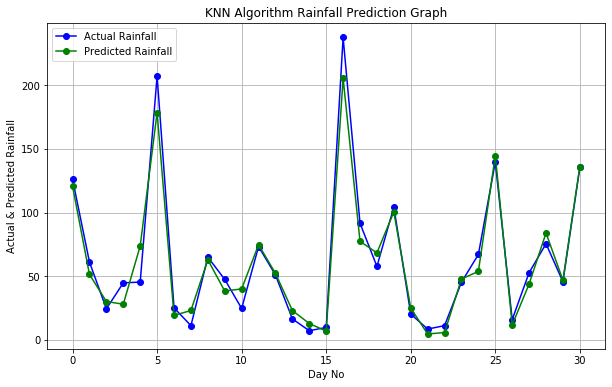

In [25]:
def runKNN():
    global rmse_arr, accuracy_arr, X, Y
    actual.clear()
    forecast.clear()
    global Xtrain, Xtest, Ytrain, Ytest
    knn_cls = KNeighborsRegressor(n_neighbors=2)
    knn_cls.fit(X, Y)
    prediction = knn_cls.predict(Xtest) 
    i = len(Ytest)-1
    while i > 0:
        actual.append(Ytest[i])
        forecast.append(prediction[i])
        i = i - 1
        if len(actual) > 30:
            break
    rmse = sqrt(mean_squared_error(Ytest,prediction))
    acc = knn_cls.score(Xtrain,Ytrain) * 100
    print("KNN RMSE : "+str(round(rmse,1)))
    print("KNN Accuracy : "+str(acc))
    rmse_arr.append(rmse)
    accuracy_arr.append(acc)
    for i in range(len(actual)):
        status = "Low"
        if forecast[i] >= 100:
            status = "Very Heavy Rain"
        if forecast[i] >= 80 and forecast[i] < 100:
            status = "Heavy Rain"
        if forecast[i] >= 50 and forecast[i] < 80:
            status = "Moderate Rain"
        if forecast[i] >= 30 and forecast[i] < 50:
            status = "Light Rain"
        if forecast[i] < 30:
            status = "No Rain"
        print("Day "+str((i+1))+" Acutal Rainfall : "+str(actual[i])+" Predicted Rainfall : "+str(forecast[i])+" "+status)
    predict("KNN Algorithm",actual, forecast)
runKNN()    

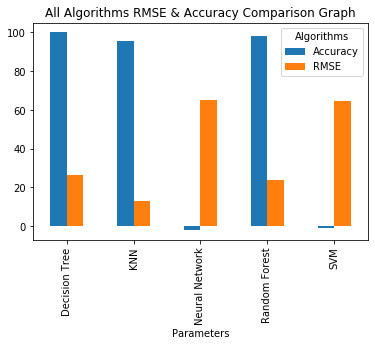

In [26]:
def graph():
    df = pd.DataFrame([['SVM','RMSE',rmse_arr[0]],['SVM','Accuracy',accuracy_arr[0]],
                       ['Random Forest','RMSE',rmse_arr[1]],['Random Forest','Accuracy',accuracy_arr[1]],
                       ['Decision Tree','RMSE',rmse_arr[2]],['Decision Tree','Accuracy',accuracy_arr[2]],
                       ['Neural Network','RMSE',rmse_arr[3]],['Neural Network','Accuracy',accuracy_arr[3]],
                       ['KNN','RMSE',rmse_arr[4]],['KNN','Accuracy',accuracy_arr[4]],                       
                      ],columns=['Parameters','Algorithms','Value'])
    df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar')
    plt.title("All Algorithms RMSE & Accuracy Comparison Graph")
    plt.show()
graph()    